# This Extras refers to previous: 
## Subsection-VID Plots

First Code Session:

In order to run the code, you will need to ensure that you have all the necessary packages installed, which are in the first code section. Once all the required packages are installed and loaded, you can import the necessary functions using the second code section.

In [1]:
using PyPlot, LinearAlgebra, JuMP, Ipopt, Statistics, RandomMatrices, Permutations, RollingFunctions

In [2]:
include("SVID_code.jl");
include("SVID_plots.jl");

The cells below are the settings for plots 12 and 13 of the article.

In [7]:
#Initial Conditions
x_init = [1;0.7;1;0.9;1;-1;-0.8;-1;-0.8;-1]

#Players targets
N_p = 2
x1_hat = -2
x2_hat = 2

targets = [x1_hat       0;
           x1_hat       0;
           x1_hat       0;  
           x1_hat    x2_hat;  
           x1_hat       0;
             0       x2_hat;
           x1_hat    x2_hat;
             0       x2_hat;
             0       x2_hat;
             0       x2_hat]  

γ = [0.01;0.01]

#Dynamics
B = [1 0; 1 0; 1 1; 1 0; 1 0; 0 1; 1 1; 0 1; 0 1; 0 1]

A = rs_ize(a_matrix())
N_a = size(A,2)


#Friedkin-Johsen model
Θ = diagm([0.5,0.3,0,0.8,0,0.1,0,0.3,0,0.6])
A_FJ = (I(N_a)-Θ)*A;

#Hegselmann-Krause model
F = 90;
W = 1.6;

A_HK = [1 1 1 1 0 0 0 0 0 0;
        1 1 1 0 1 0 0 0 0 0;
        1 1 1 1 1 0 0 0 0 0;
        1 0 1 1 1 1 1 0 0 0;
        0 1 1 1 1 0 0 0 0 1;
        0 0 0 0 0 1 1 1 1 0;
        1 0 0 0 1 1 1 1 1 1;
        0 0 0 0 0 1 0 1 1 1;
        0 0 0 0 0 1 1 1 1 1;
        0 0 0 1 0 0 1 1 1 1]

K_f = 35; #horizon
T = K_f;

# Configuration for Plots

## Figure 12
Set "perm_flag = 1", and plot FJc with "model = 2" (this is default)

In [8]:
p_flag = 0; #Projection flag
perm_flag = 1; #Perm flag
#last digit is model: 1 - DeGroot; 2 - FJ; 3 - HK
x_os_dg, u_os_dg = COD_OSA_GS(x_init,targets,γ,K_f,A,B,Θ,F,W,p_flag,perm_flag,1);
x_os_fj, u_os_fj = COD_OSA_GS(x_init,targets,γ,K_f,A_FJ,B,Θ,F,W,p_flag,perm_flag,2);
x_os_hk, u_os_hk = COD_OSA_GS(x_init,targets,γ,K_f,A,B,Θ,F,W,p_flag,perm_flag,3);
x_os = [x_os_dg;x_os_fj;x_os_hk];

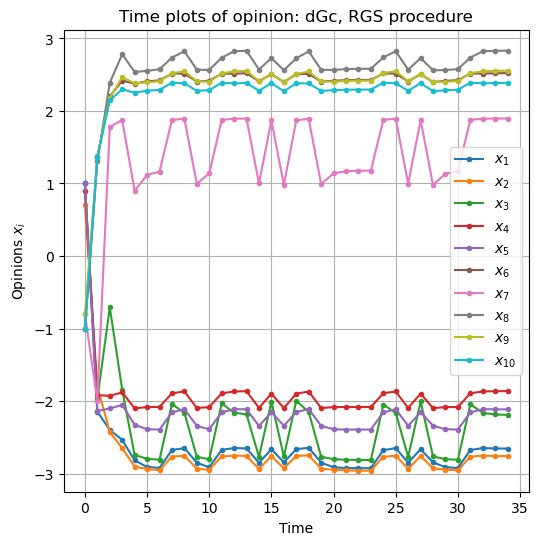

In [10]:
#x_plot = mov_avg(x_os_1fj, 1)

model = 1  # model: 1 - DeGroot; 2 - FJ; 3 - HK
save = 0
plot_targ_10a(x_os, T, perm_flag, model, save)

# Extra

All models can be simulated, with RGS and GS procedures, using the above codes. Just be sure to choose between RGS, "perm_flag = 1", or GS, "perm_flag = 0", and the desired model, with model = "x", where x = 1 (DeGroot); = 2 (FJ); = 3 (HK).